In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Folder and Data file

In [2]:
root_folder = "D:/ABSA work/codes/flan_t5/results/"

In [3]:
import os

def list_files_in_subfolders(root_folder):
    file_list = []
    for root, _, files in os.walk(root_folder):
        for file in files:
            # Get the file name without extension
            if file.lower().endswith('.csv'):
                file_name = os.path.splitext(file)[0]
                # csv_file_list.append(file_name)
                file_list.append(file_name)
    return file_list

# Function for Reports

##String to List


In [4]:
import ast
def convert_string_to_list(input_string):
  if '[' in input_string:
    return ast.literal_eval(input_string)
  else:
    # ',' in input_string:
    required_output = [word.strip() for word in input_string.split(',')]
    return required_output
  # else:
  #   required_output = [word.strip() for word in input_string.split(',')]
  #   return input_string




In [5]:
# # Apply lowercase to 'Polarity' column
# df['Sentiment'] = df['Sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# df['sentiment_t5'] = df['sentiment_t5'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# # Apply string conversion to 'Polarity' column
# df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
# df['sentiment_t5'] = df['sentiment_t5'].apply(convert_string_to_list)

In [6]:
if (type(["HEllo"]) is list):
  print("hello")

hello


## Accuracy function

In [7]:
import re
# Function to calculate accuracy between "sentiment" and 'sentiment_t5' lists
def calculate_accuracy(sentiments, predicted_sentiments):
    correct_predictions = 0.0
    total_predictions = 0.0
    predictions_list=[]
    sentiments_list=[]
    for sentiment, predicted_sentiment in zip(sentiments, predicted_sentiments):
        # print(type(sentiment), type(deberta_sentiment))
        total_predictions += len(sentiment)
        # print(type(sentiment), type(predicted_sentiment))
        for s, d in zip(sentiment, predicted_sentiment):
            cleaned_string = re.sub(r'[^\w\s]', '', d)
            # Print the cleaned string
            # print(s, cleaned_string)
            sentiments_list.append(s)
            predictions_list.append(cleaned_string)
            # print(s,"      ", d)
            if s == d:
                correct_predictions += 1
            # else:
            #    print(sentiment, predicted_sentiment)

    accuracy = correct_predictions / total_predictions
    return accuracy, sentiments_list, predictions_list


In [8]:
import re
# Function to calculate accuracy between "sentiment" and 'sentiment_t5' lists
def calculate_accuracy_single(sentiments, predicted_sentiments):
    correct_predictions = 0.0
    total_predictions = 0.0
    predictions_list=[]
    sentiments_list=[]
    for s, d in zip(sentiments, predicted_sentiments):
        total_predictions += 1
        cleaned_string = re.sub(r'[^\w\s]', '', d)
        # print(s, cleaned_string)
        sentiments_list.append(s)
        predictions_list.append(cleaned_string)
        # print(s,"      ", d)
        if s == d:
            correct_predictions += 1
        # else:
        #    print(sentiment, predicted_sentiment)

    accuracy = correct_predictions / total_predictions
    return accuracy, sentiments_list, predictions_list


## Classificaiton Report

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate classification report which includes precision, recall, and f1-score per class
def save_report(actual_labels, predicted_labels, filename, title):
  class_report = classification_report(actual_labels, predicted_labels)

  print("\nClassification Report:")
  print(class_report)
  with open(filename+'_classification_report' + '.txt', 'w') as f:
      f.write(class_report)
  print("Classification report saved to 'classification_report_" + title + ".txt'")

## Confusion matrix

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
def plot_confusion_matrix(actual_labels, predicted_labels, filename, title):
  # Get unique class labels
  class_labels = list(set(actual_labels+predicted_labels))

  # Create confusion matrix
  conf_matrix = confusion_matrix(actual_labels, predicted_labels, labels=class_labels)

  # Plot the confusion matrix using Seaborn
  plt.figure(figsize=(6, 5))
  sns.set(font_scale=1.0)
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
              xticklabels=class_labels, yticklabels=class_labels, cbar=True)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"Confusion Matrix for {title}")
  plt.tight_layout()
  plt.savefig(filename+".png")
  plt.show()


## Save results in CSV

In [12]:
def save_results( all_true_labels, all_predicted_labels, folder_name, data, title, test_acc, task="ATSA"):
  # Calculate precision, recall, and F-score
    precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
    recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
    f_score = f1_score(all_true_labels, all_predicted_labels, average='weighted')
    if 'acsa' in title.lower() or 'category' in title.lower() or 'sentihood' in title.lower():
      task='ACSA'
    data_to_append = {
        'dataset_name': data+title,
        'task':task,
        'test_accuracy': round(test_acc*100, 2),
        'f_score': round(f_score*100, 2),
        'recall': round(recall*100,2),
        'precision': round(precision*100,2)
    }

    csv_file = folder_name+"Results_t5.csv"  # Replace with your CSV file name

    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        df = pd.DataFrame(columns=['dataset_name', 'task', 'test_accuracy', 'f_score', 'precision', 'recall'])

    df = df.append(data_to_append, ignore_index=True)
    df.to_csv(csv_file, index=False)



# DOTSA Dataset

In [13]:
data = "dotsa/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
list_files


['new_Books_test_t5',
 'new_Clothing_test_t5',
 'new_Hotels_test_t5',
 'new_Restaurant_test_t5']

In [14]:
filename = data_folder+list_files[0]
csv_file = filename+".csv"
import pandas as pd
df = pd.read_csv(csv_file)
print(len(df))
df.head(3)


368


,dataset_name,sentence,aspect,polarity,sentiment_t5
0,dotsa/new_Books_test,This story is one of too many heartbreaking st...,story,Mixed,Neutral
1,dotsa/new_Books_test,Good Faye Kellerman ! ! ! She manages to keep ...,Faye Kellerman,Positive,Positive
2,dotsa/new_Books_test,Good Faye Kellerman ! ! ! She manages to keep ...,characters,Positive,Positive


In [15]:
# Check for null values in any column of each row
rows_with_null = df[df.isnull().any(axis=1)]
print(len(rows_with_null))
# rows_with_null

0


## Call Accuracy and report in loop

Null values are:  0 in  new_Books_test_t5
<class 'list'>
Accuracy: 0.6847826086956522 for new_Books_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.68      0.63        73
     neutral       0.18      0.22      0.20        50
    positive       0.86      0.78      0.82       245

    accuracy                           0.68       368
   macro avg       0.54      0.56      0.55       368
weighted avg       0.71      0.68      0.70       368

Classification report saved to 'classification_report_Books_test_t5.txt'


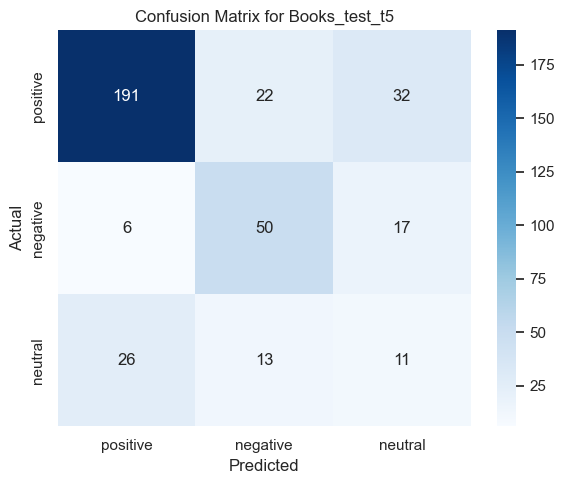

C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Clothing_test_t5
<class 'list'>
Accuracy: 0.7397959183673469 for new_Clothing_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.67      0.68        39
     neutral       0.42      0.61      0.49        36
    positive       0.92      0.80      0.85       121

    accuracy                           0.74       196
   macro avg       0.68      0.69      0.68       196
weighted avg       0.78      0.74      0.75       196

Classification report saved to 'classification_report_Clothing_test_t5.txt'


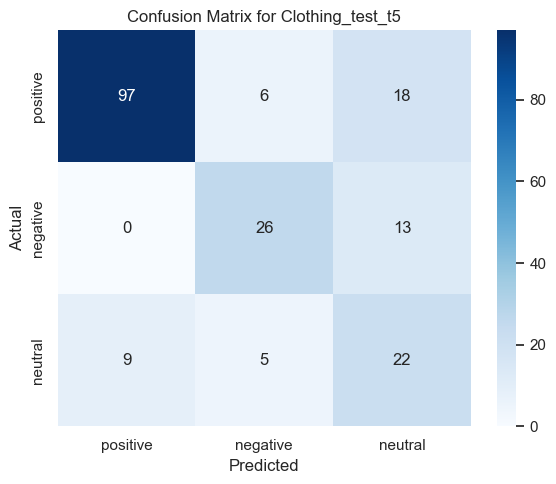

C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\skle

Null values are:  0 in  new_Hotels_test_t5
<class 'list'>
Accuracy: 0.9016393442622951 for new_Hotels_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66        36
     neutral       0.17      0.26      0.21        23
 not present       0.00      0.00      0.00         0
    positive       0.96      0.96      0.96       490

    accuracy                           0.90       549
   macro avg       0.47      0.45      0.46       549
weighted avg       0.92      0.90      0.91       549

Classification report saved to 'classification_report_Hotels_test_t5.txt'


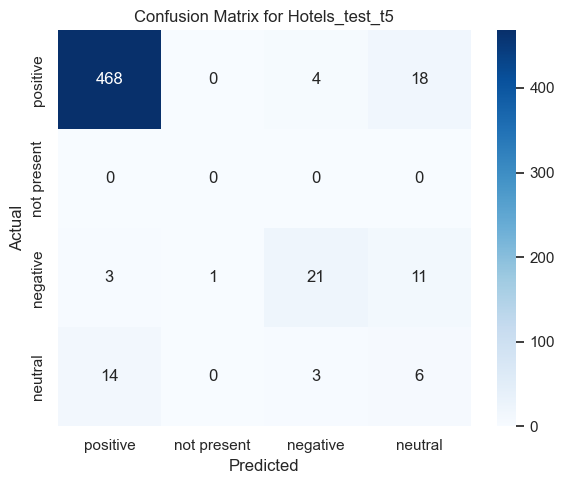

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Restaurant_test_t5
<class 'list'>
Accuracy: 0.7947214076246334 for new_Restaurant_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.72      0.64       106
     neutral       0.18      0.16      0.17        62
    positive       0.93      0.89      0.91       514

    accuracy                           0.79       682
   macro avg       0.56      0.59      0.57       682
weighted avg       0.80      0.79      0.80       682

Classification report saved to 'classification_report_Restaurant_test_t5.txt'


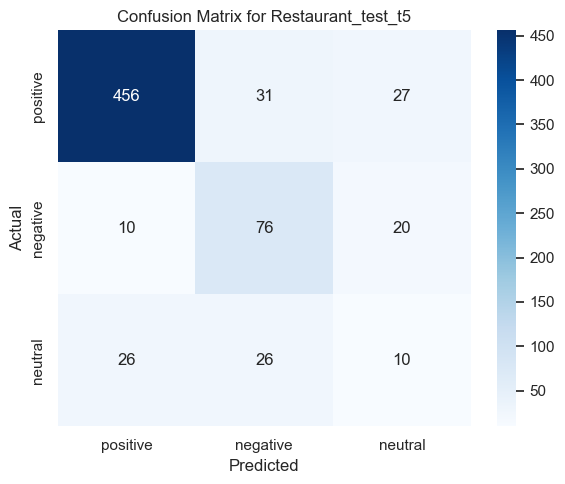

C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [16]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['Sentiment'] = df['Sentiment'].apply(lambda x: x.replace('mixed', 'neutral') if isinstance(x, str) else x)
  df['sentiment_t5'] = df['sentiment_t5'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  df['sentiment_t5'] = df['sentiment_t5'].apply(convert_string_to_list)
  print(type(df["Sentiment"][0]) )
  if type(df["Sentiment"][1]) is list:
    accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df['sentiment_t5'])
  else:
    accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["Sentiment"], df['sentiment_t5'])
  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i][4:])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i][4:])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i][4:], test_acc=accuracy )

# MAMS Dataset

In [17]:
import pandas as pd
data = "MAMS/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['ACSA_test_old_t5', 'ACSA_test_t5', 'ATSA_test_t5']

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Null values are:  0 in  ACSA_test_old_t5
The file is ACSA_test_old_t5
Accuracy: 0.3196448390677026 for ACSA_test_old_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.54      0.65      0.59       263
     neutral       0.10      0.01      0.01       393
 not present       0.00      0.00      0.00         0
    positive       0.68      0.47      0.56       245

    accuracy                           0.32       901
   macro avg       0.33      0.28      0.29       901
weighted avg       0.39      0.32      0.33       901

Classification report saved to 'classification_report_ACSA_test_old_t5.txt'


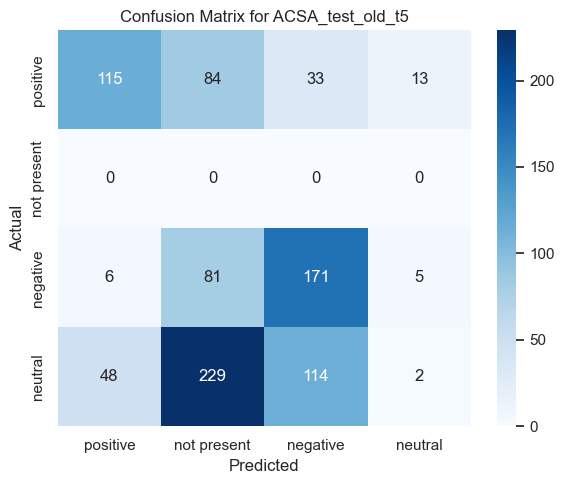

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_

Null values are:  0 in  ACSA_test_t5
The file is ACSA_test_t5
Accuracy: 0.4938956714761376 for ACSA_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.47      0.76      0.58       263
     neutral       0.48      0.29      0.36       393
 not present       0.00      0.00      0.00         0
    positive       0.55      0.54      0.54       245

    accuracy                           0.49       901
   macro avg       0.37      0.40      0.37       901
weighted avg       0.50      0.49      0.47       901

Classification report saved to 'classification_report_ACSA_test_t5.txt'


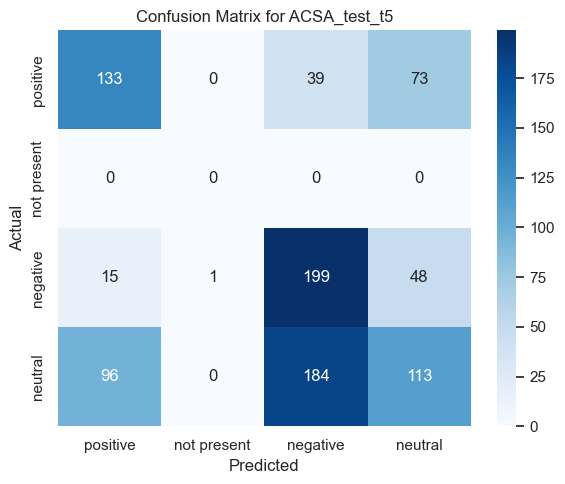

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_

Null values are:  0 in  ATSA_test_t5
The file is ATSA_test_t5
Accuracy: 0.5261976047904192 for ATSA_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.77      0.58       329
     neutral       0.55      0.33      0.41       607
 not present       0.00      0.00      0.00         0
    positive       0.58      0.63      0.61       400

    accuracy                           0.53      1336
   macro avg       0.40      0.43      0.40      1336
weighted avg       0.54      0.53      0.51      1336

Classification report saved to 'classification_report_ATSA_test_t5.txt'


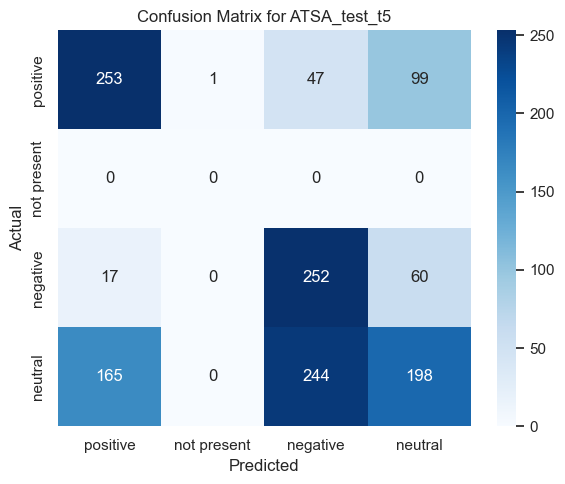

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [18]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['polarity'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_t5'] = df['sentiment_t5'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['polarity'] = df['polarity'].apply(convert_string_to_list)
  df['sentiment_t5'] = df['sentiment_t5'].apply(convert_string_to_list)
  print(f"The file is {list_files[i]}\n============================" )
  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["polarity"], df['sentiment_t5'])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )


# Yaso Dataset

In [19]:
data = "YASO/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['TSA-MD_val_t5', 'TSA-MD_val_t5_old']

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Null values are:  0 in  TSA-MD_val_t5
Accuracy: 0.8352941176470589 for TSA-MD_val_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.82      0.88        40
     neutral       0.00      0.00      0.00         0
    positive       0.99      0.84      0.91       130

    accuracy                           0.84       170
   macro avg       0.64      0.55      0.60       170
weighted avg       0.98      0.84      0.90       170

Classification report saved to 'classification_report_TSA-MD_val_t5.txt'


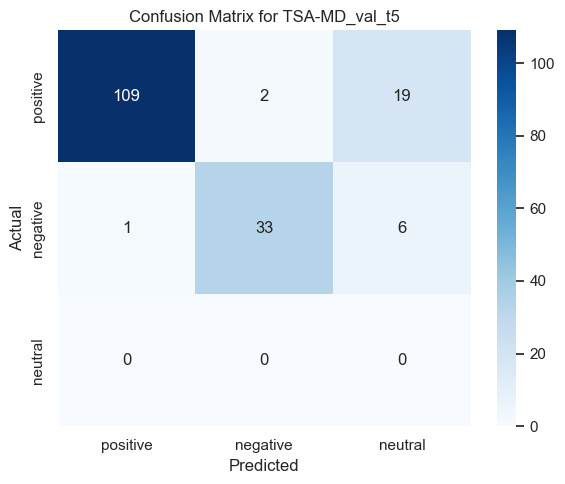

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_

Null values are:  0 in  TSA-MD_val_t5_old
Accuracy: 0.7764705882352941 for TSA-MD_val_t5_old

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.85      0.92        40
     neutral       0.00      0.00      0.00         0
 not present       0.00      0.00      0.00         0
    positive       1.00      0.75      0.86       130

    accuracy                           0.78       170
   macro avg       0.50      0.40      0.44       170
weighted avg       1.00      0.78      0.87       170

Classification report saved to 'classification_report_TSA-MD_val_t5_old.txt'


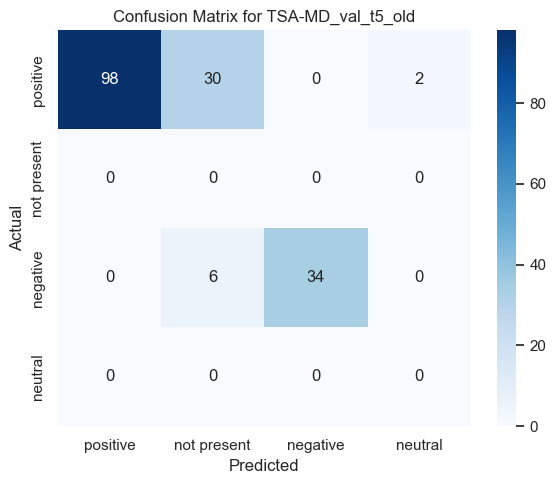

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [20]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  df.dropna(subset='sentiment_t5', inplace=True)
  # Apply lowercase to 'Polarity' column
  df['sentiment'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_t5'] = df['sentiment_t5'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # # Apply string conversion to 'Polarity' column
  # df['sentiment'] = df['sentiment'].apply(convert_string_to_list)
  # df['sentiment_t5'] = df['sentiment_t5'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["sentiment"][:170], df['sentiment_t5'][:170])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )

# SemEval 2016

In [21]:
data = "SemEval2016/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['laptops_test_category_t5',
 'restaurants_test_category_old_t5',
 'restaurants_test_category_t5',
 'restaurants_test_t5']

75
Null values are:  0 in  laptops_test_category_t5
Accuracy: 0.6878901373283396 for laptops_test_category_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.59      0.72       274
     neutral       0.13      0.74      0.23        46
    positive       0.95      0.74      0.83       481

    accuracy                           0.69       801
   macro avg       0.67      0.69      0.59       801
weighted avg       0.89      0.69      0.76       801

Classification report saved to 'classification_report_laptops_test_category_t5.txt'


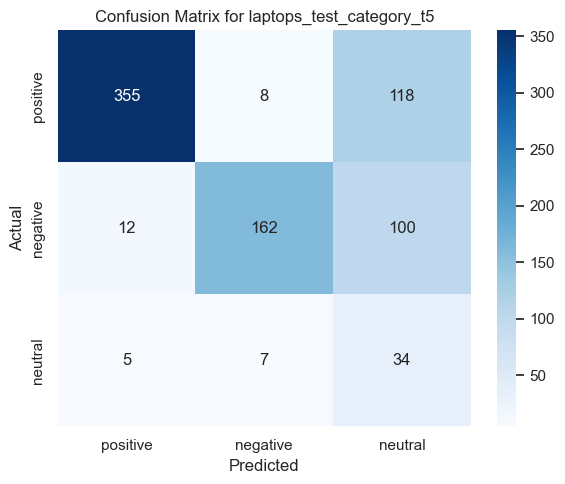

C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\skle

83
Null values are:  0 in  restaurants_test_category_old_t5
Accuracy: 0.6963123644251626 for restaurants_test_category_old_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.76      0.82       220
     neutral       0.55      0.27      0.36        45
 not present       0.00      0.00      0.00         0
    positive       0.99      0.70      0.82       657

    accuracy                           0.70       922
   macro avg       0.61      0.43      0.50       922
weighted avg       0.94      0.70      0.80       922

Classification report saved to 'classification_report_restaurants_test_category_old_t5.txt'


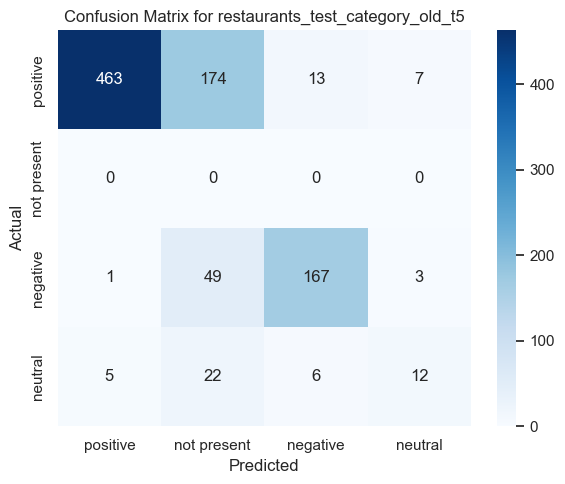

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


79
Null values are:  0 in  restaurants_test_category_t5
Accuracy: 0.8498253783469151 for restaurants_test_category_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.81      0.83       204
     neutral       0.25      0.68      0.37        44
    positive       0.98      0.88      0.93       611

    accuracy                           0.85       859
   macro avg       0.69      0.79      0.71       859
weighted avg       0.91      0.85      0.87       859

Classification report saved to 'classification_report_restaurants_test_category_t5.txt'


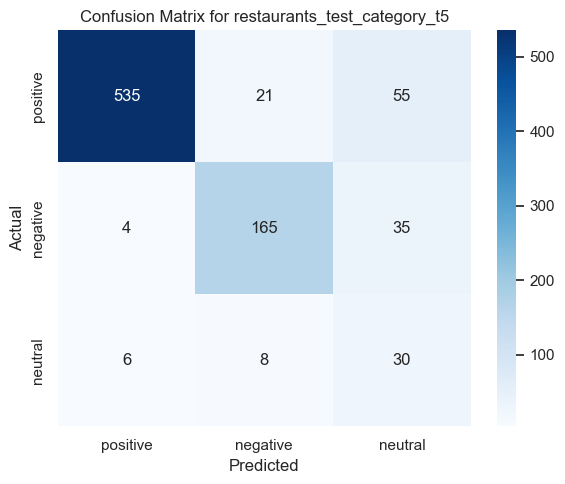

C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


70
Null values are:  0 in  restaurants_test_t5
Accuracy: 0.8446153846153847 for restaurants_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.83      0.85       135
     neutral       0.22      0.69      0.33        32
    positive       0.99      0.86      0.92       483

    accuracy                           0.84       650
   macro avg       0.69      0.79      0.70       650
weighted avg       0.93      0.84      0.88       650

Classification report saved to 'classification_report_restaurants_test_t5.txt'


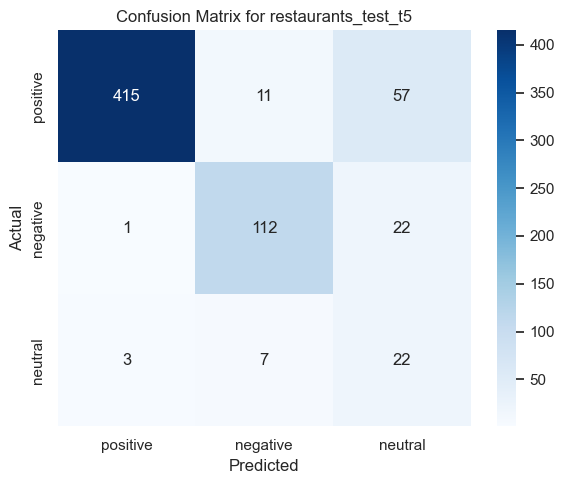

C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [22]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  print(len(csv_file))
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  df.dropna(subset='sentiment_t5', inplace=True)
  # Apply lowercase to 'Polarity' column
  df['polarity'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_t5'] = df['sentiment_t5'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # # Apply string conversion to 'Polarity' column
  # df['sentiment'] = df['sentiment'].apply(convert_string_to_list)
  # df['sentiment_t5'] = df['sentiment_t5'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["polarity"], df['sentiment_t5'])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )

# Sentihood

In [23]:
data = "Sentihood/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['Sentihood_test_category_t5', 'Sentihood_test_t5']

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

75
Null values are:  0 in  Sentihood_test_category_t5
Accuracy: 0.5229303156640858 for Sentihood_test_category_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.57      0.66       462
     neutral       0.00      0.00      0.00         0
    positive       0.97      0.50      0.66      1217

    accuracy                           0.52      1679
   macro avg       0.59      0.36      0.44      1679
weighted avg       0.92      0.52      0.66      1679

Classification report saved to 'classification_report_Sentihood_test_category_t5.txt'


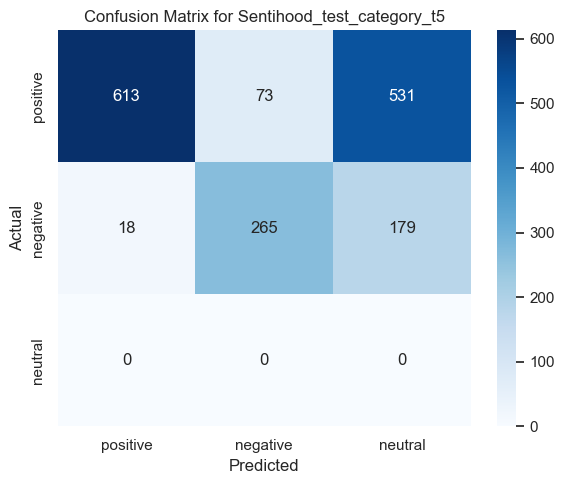

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_

66
Null values are:  0 in  Sentihood_test_t5
Accuracy: 0.5151876116736153 for Sentihood_test_t5

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.58      0.67       462
     neutral       0.00      0.00      0.00         0
    positive       0.97      0.49      0.65      1217

    accuracy                           0.52      1679
   macro avg       0.59      0.36      0.44      1679
weighted avg       0.92      0.52      0.66      1679

Classification report saved to 'classification_report_Sentihood_test_t5.txt'


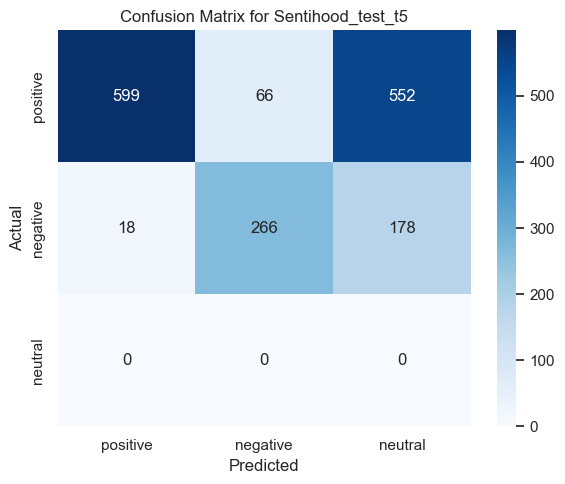

c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nimra\AppData\Local\Temp\ipykernel_3700\3717386407.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [24]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  print(len(csv_file))
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  df.dropna(subset='sentiment_t5', inplace=True)
  # Apply lowercase to 'Polarity' column
  df['polarity'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_t5'] = df['sentiment_t5'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # # Apply string conversion to 'Polarity' column
  # df['sentiment'] = df['sentiment'].apply(convert_string_to_list)
  # df['sentiment_t5'] = df['sentiment_t5'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["polarity"], df['sentiment_t5'])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )